WebGuiWidget(value={'ngsolve_version': '6.2.2203', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': Fals…

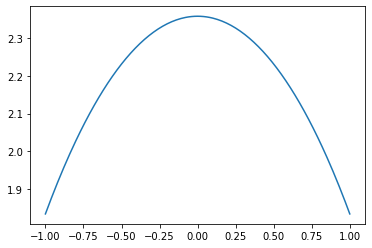

torsional rigidity = 35.98771580341495


In [1]:
# torsional rigidity
# solve the Poisson equation -Delta u = f
# with Dirichlet boundary condition u = 0

from ngsolve import *
import netgen.geom2d as geom2d
from ngsolve.webgui import Draw

ngsglobals.msg_level = 1

geo = geom2d.SplineGeometry()
p1,p2,p3,p4 = [ geo.AppendPoint(x,y) for x,y in [(-2,-2), (2,-2), (2,2), (-2,2)] ]
geo.Append (["line", p1, p2], leftdomain=1, rightdomain=0)
geo.Append (["line", p2, p3], leftdomain=1, rightdomain=0)
geo.Append (["line", p3, p4], leftdomain=1, rightdomain=0)
geo.Append (["line", p4, p1], leftdomain=1, rightdomain=0)
        
# generate a triangular mesh of mesh-size maxh
mesh = Mesh(geo.GenerateMesh(maxh=0.05))

# H1-conforming finite element space
fes = H1(mesh, order=3, dirichlet=[1,2,3,4])

# define trial- and test-functions
u = fes.TrialFunction()
v = fes.TestFunction()

# define the coefficient function
b = 1
c = 2

# the right hand side
f = LinearForm(fes)
f +=  c *v * dx

# the bilinear-form 
a = BilinearForm(fes, symmetric=True)
a += b*grad(u)*grad(v)*dx

a.Assemble()
f.Assemble()

# the solution field 
gfu = GridFunction(fes)
gfu.vec.data = a.mat.Inverse(fes.FreeDofs(), inverse="sparsecholesky") * f.vec
# print (u.vec)


# plot the solution (netgen-gui only)
Draw (gfu)
#Draw (-grad(gfu), mesh, "Flux")

# 2D plot
import matplotlib.pyplot as plt
N = 100
ypnts = [i/N for i in range(-N, N+1, 1)]
vals = [gfu(mesh(0,yi)) for yi in ypnts]

plt.plot(ypnts,vals)
plt.show(block=False)

print ("torsional rigidity =", Integrate ( grad(gfu)*grad(gfu), mesh))


In [15]:
import numpy as np
M1 = 0.1406 *  4 ** 4
M2 = 0.1388* 4**4
t = 1/1.01
print([M1, M2, t])



[35.9936, 35.5328, 0.9900990099009901]


In [1]:
# cell problem
from ngsolve import *
import netgen.geom2d as geom2d
from ngsolve.webgui import Draw

geo = geom2d.SplineGeometry()
geo.AddCircle(c=(-0,0), r=1, bc="c", leftdomain=2, rightdomain=1)
geo.AddRectangle((-2,-2), (2,2), bcs=["b","r","t","l"], leftdomain=1)

geo.SetMaterial(1, "outer")
geo.SetMaterial(2, "inner")

# generate a triangular mesh of mesh-size maxh
mesh = Mesh(geo.GenerateMesh(maxh=0.05))

fes1 = H1(mesh, definedon="inner")
u1 = GridFunction(fes1, "u1")
u1.Set (1.01)

fes2 = H1(mesh, definedon="outer")
u2 = GridFunction(fes2, "u2")
u2.Set (1)


fes = H1(mesh, order=3,dirichlet="b|l|r|t")
u = fes.TrialFunction()
v = fes.TestFunction()

gfu = GridFunction(fes)



f = LinearForm(fes)
f += 2*v*dx
f.Assemble()

a = BilinearForm(fes)
a += SymbolicBFI (u1*grad(u)*grad(v), definedon=mesh.Materials("inner"))
a += SymbolicBFI (u2*grad(u)*grad(v), definedon=mesh.Materials("outer"))
a.Assemble()

gfu.vec.data = a.mat.Inverse(fes.FreeDofs()) * f.vec

sts = [-grad(gfu)[1], -grad(gfu)[0]]

Draw (u1); Draw (u2)
Draw (gfu)
#Draw (sts, mesh, "Flux")

print ("torsional rigidity =", Integrate ( u1*grad(gfu)*grad(gfu), mesh)+Integrate ( u2*grad(gfu)*grad(gfu), mesh))

WebGuiWidget(value={'ngsolve_version': '6.2.2203', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': Fals…

WebGuiWidget(value={'ngsolve_version': '6.2.2203', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': Fals…

WebGuiWidget(value={'ngsolve_version': '6.2.2203', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': Fals…

torsional rigidity = 35.972111800921475


In [9]:
from ngsolve import *
import netgen.geom2d as geom2d
from ngsolve.webgui import Draw

geo = geom2d.SplineGeometry()
geo.AddCircle(c=(-0,0), r=1, bc="c", leftdomain=2, rightdomain=1)
geo.AddRectangle((-2,-2), (2,2), bcs=["b","r","t","l"], leftdomain=1)
geo.SetMaterial(1, "outer")

# generate a triangular mesh of mesh-size maxh
mesh = Mesh(geo.GenerateMesh(maxh=0.05))

fes = H1(mesh, order=3,dirichlet="b|l|r|t|c", definedon="outer")
u = fes.TrialFunction()
v = fes.TestFunction()

gfu = GridFunction(fes)



f = LinearForm(fes)
f += 2*v*dx
f.Assemble()

a = BilinearForm(fes)
a += u * v * dx
a.Assemble()

gfu.vec.data = a.mat.Inverse(fes.FreeDofs()) * f.vec

sts = [-grad(gfu)[1], -grad(gfu)[0]]

Draw (u1); Draw (u2)
Draw (gfu)
#Draw (sts, mesh, "Flux")

print ("torsional rigidity =", Integrate ( grad(gfu)*grad(gfu), mesh))

NameError: name 'u1' is not defined